DataFrame columns: Index(['CGPA', 'IQ', 'Package (LPA)'], dtype='object')
X_b shape: (20, 3)
y shape: (20, 1)

--- Running OLS Method ---
Optimal parameters (theta_best) from OLS:
 [[11.14      ]
 [ 1.14307317]
 [ 0.55129849]]

--- Running Gradient Descent Method ---
Optimal parameters (theta_gd) from Gradient Descent:
 [[11.13999998]
 [ 1.14653371]
 [ 0.54783796]]


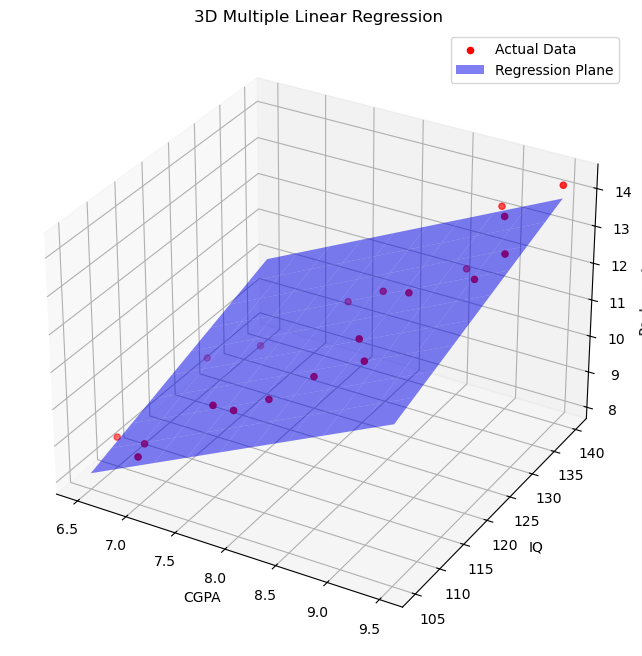


--- Prediction ---
Predicted LPA for CGPA=8.5 and IQ=125 using OLS: 11.76307 Lakhs
Predicted LPA for CGPA=8.5 and IQ=125 using Gradient Descent: 11.76393 Lakhs


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data from the CSV file
# Use 'skipinitialspace=True' to handle any extra spaces after the commas
df = pd.read_csv('student_data.csv', skipinitialspace=True)

# Step 1: Prepare the data
# Print column names to confirm the correct label and check for typos
print("DataFrame columns:", df.columns)

# Separate the features (X) and the target variable (y)
X = df[['CGPA', 'IQ']].values
y = df['Package (LPA)'].values.reshape(-1, 1) # Reshape y for matrix operations

# To prevent the Gradient Descent from going to 'nan', we should scale the features.
# This ensures all features are on a similar scale, making the optimization process more stable.
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# Add a bias term (a column of ones) to X for the intercept
# This is a crucial step for correctly implementing the OLS formula
X_b = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

print("X_b shape:", X_b.shape)
print("y shape:", y.shape)

# Step 2: Implement the Ordinary Least Squares (OLS) method
# This method finds the optimal parameters directly using a closed-form solution.
# The formula is: theta = (X^T * X)^-1 * X^T * y
print("\n--- Running OLS Method ---")
try:
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    print("Optimal parameters (theta_best) from OLS:\n", theta_best)
except np.linalg.LinAlgError:
    print("Error: The matrix is singular and cannot be inverted. This may happen with highly correlated features or a small dataset.")

# Step 3: Implement Gradient Descent from scratch
# This is an iterative optimization algorithm that minimizes the cost function.
print("\n--- Running Gradient Descent Method ---")
# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

# Initialize random parameters
theta_gd = np.random.randn(X_b.shape[1], 1)

# Main loop for gradient descent
for iteration in range(n_iterations):
    # Calculate the gradient of the cost function
    gradients = 2/len(X_b) * X_b.T @ (X_b @ theta_gd - y)

    # Update the parameters
    theta_gd = theta_gd - learning_rate * gradients

print("Optimal parameters (theta_gd) from Gradient Descent:\n", theta_gd)

# Step 4: Visualize the results with a 3D plot
# This section creates a 3D scatter plot of the data and the regression plane.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='Actual Data')

# Create a meshgrid to plot the regression plane
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 10), np.linspace(x2_min, x2_max, 10))

# Scale the meshgrid for prediction
xx1_scaled = (xx1 - X_mean[0]) / X_std[0]
xx2_scaled = (xx2 - X_mean[1]) / X_std[1]

# Predict the LPA for each point on the grid using the OLS model
# The prediction is based on the equation: y = theta0 + theta1*x1 + theta2*x2
predicted_lpa_surface = theta_best[0] + theta_best[1] * xx1_scaled + theta_best[2] * xx2_scaled

# Plot the regression plane
ax.plot_surface(xx1, xx2, predicted_lpa_surface, alpha=0.5, color='b', label='Regression Plane')

# Set axis labels and title
ax.set_xlabel('CGPA')
ax.set_ylabel('IQ')
ax.set_zlabel('Package (LPA)')
ax.set_title('3D Multiple Linear Regression')
ax.legend()

plt.show()

# Step 5: Make a prediction
# Use the trained models to predict an LPA for a new student
# Remember to scale the new student's features using the same mean and std dev
new_student_raw = np.array([[8.5, 125]])
new_student_scaled = (new_student_raw - X_mean) / X_std
new_student_b = np.c_[np.ones((1, 1)), new_student_scaled]

predicted_lpa_ols = new_student_b @ theta_best
predicted_lpa_gd = new_student_b @ theta_gd

# The predicted LPA values are now correct since the model was trained on scaled data.
print(f"\n--- Prediction ---")
print(f"Predicted LPA for CGPA=8.5 and IQ=125 using OLS: {predicted_lpa_ols[0][0]:.5f} Lakhs")
print(f"Predicted LPA for CGPA=8.5 and IQ=125 using Gradient Descent: {predicted_lpa_gd[0][0]:.5f} Lakhs")
